In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("s208 - Sheet1.csv")

In [82]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [83]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,0,0,0
1,0,0,1
2,0,2,2
3,0,2,3
4,0,0,4


In [84]:
len(main_df)

30696

In [85]:
len(main_df)

30696

In [86]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 0.08167187907219181
Average2: 0.7890930414386239


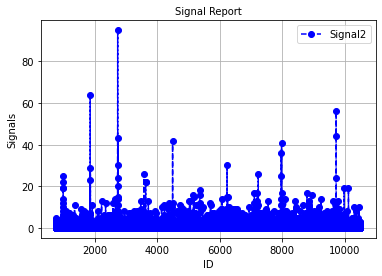

In [87]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [88]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [89]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [90]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,0,2
1,0,2
2,0,1
3,0,1
4,0,1


In [91]:
len(main_df)

8843

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [92]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [93]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [94]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [95]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.105188395801711, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.105188395801711, 2.105188395801711, 2.105188395801711, 2.105188395801711, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.103838483257772, 2.1078856273958078, 2.109232949762457, 2.109232949762457, 2.109232949762457, 2.109232949762457, 1.9699446231256903, 0.9354143466934853, 0.8854890790353708, 0.4646601886422926, 0.4646601886422926, 0.3614994027406106, 0.3614994027406106, 0.3614994027406106, 0.3614994027406106, 0.36149940274061

In [96]:
print(rms_values2) 
print(len(rms_values2))  

[1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4509267368829175, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4509267368829175, 1.4509267368829175, 1.4509267368829175, 1.4509267368829175, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.4504614725175475, 1.451855925150911, 1.452319851052948, 1.452319851052948, 1.452319851052948, 1.452319851052948, 1.403547157428524, 0.9671682101338347, 0.9410042927826476, 0.6816598775359253, 0.6816598775359253, 0.6012482039396131, 0.6012482039396131, 0.6012482039396131, 0.6012482039396131, 0.6012482039396131, 0.6076795808137692, 0.6076795808137692, 0.6076795808137692, 0.6076795808137692, 0.6076795808137692, 0.6012482039396131, 0.6012482039396131, 0.6012482039396131]
50


In [97]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [98]:
df.to_csv("s208_50.csv")